In [313]:
#import libraries


import numpy as np
import pandas as pd
import hvplot.pandas
import sqlalchemy
from pathlib import Path
import plotly.express as px
import holoviews as hv

#loads state code dictionary to simplify heatmap creation 
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [414]:
#imports csv file called "revised_school_data"
#contains basic data for many of the comparisons in this jupyter notebook 
#including Rank, Rank in Spending, Spending per Student, and Total Funding
school_df = pd.read_csv(
    Path("../uncc_project1/revised_school_data.csv"))

#deletes a column of state names that was a duplicate caused by having merged 2 csv files
#then displays first 5 rows to check that the drop worked
school_df=school_df.drop(columns=['State.1'],axis=1)
school_df.head()

,State,Rank in Spending,Spending per pupil,Total Funding,Funding State Sources,Funding Local Sources,Total Expenditures,Current Spending,Rank,College Readiness,High School Graduation Rate,NAEP Math Scores,NAEP Reading Scores,Preschool Enrollment
0,Alabama,45,9636,803907000,4148764000,2652925000,7854516000,7.000000e+09,45,44,5,49,48,38
1,Alaska,7,16576,307320000,1613675000,573685000,2623014000,2.327151e+09,49,37,49,43,49,33
2,Arizona,48,8882,1160908000,3440726000,3828455000,7984562000,7.276067e+09,47,47,47,27,37,42
3,Arkansas,43,9976,593656000,4122377000,668082000,5407470000,4.750938e+09,38,45,9,43,37,19
4,California,27,11588,7709079000,50904567000,27943521000,82146317000,7.264124e+10,40,33,36,38,37,16


In [315]:
#creates a heat map of "Spending per Pupil" in each state
#used in powerpoint & it helps to get a base understanding of the data

school_df['Code'] = school_df['State'].map(code)
fig = px.choropleth(school_df,
                    locations='Code',
                    color= school_df['Spending per pupil'].astype(float),
                    color_continuous_scale='spectral_r',
                    range_color=[7500,21000],
                    hover_name='State',
                    locationmode='USA-states',
                    title="Spending per Student by State",
                    scope='usa',
                    width=700,
                    height=500,
                   )
fig.update_layout(coloraxis_colorbar=dict(
    title="USD"))
fig= fig.update_layout(margin_l=5)
fig=fig.update_layout(margin_r=10)
fig

In [417]:
#sorts the values by Spending per Pupil from greatest to least
top_10_spending = school_df.sort_values('Spending per pupil', ascending=False)
top_10_spending.head(10)

In [418]:
#sorts the values by Spending per Pupil from least to greatest
top_10_spending = school_df.sort_values('Spending per pupil', ascending=True)
top_10_spending.head(10)

,State,Rank in Spending,Spending per pupil,Total Funding,Funding State Sources,Funding Local Sources,Total Expenditures,Current Spending,Rank,College Readiness,High School Graduation Rate,NAEP Math Scores,NAEP Reading Scores,Preschool Enrollment
43,Utah,51,7954,394060000,2533573000,2018775000,4919361000,4.095444e+09,21,36,20,16,6,31
11,Idaho,50,8141,240322000,1454830000,570661000,2100980000,1.971800e+09,23,5,45,9,10,48
41,Tennessee,49,8324,1096182000,4395757000,4067783000,9665661000,8.886616e+09,31,34,5,27,30,41
2,Arizona,48,8882,1160908000,3440726000,3828455000,7984562000,7.276067e+09,47,47,47,27,37,42
23,Mississippi,47,8919,690724000,2411621000,1641653000,4631356000,4.246156e+09,43,49,32,43,45,4
35,Oklahoma,46,9353,689756000,2909651000,2502643000,6169069000,5.474468e+09,44,41,39,38,41,37
0,Alabama,45,9636,803907000,4148764000,2652925000,7854516000,7.000000e+09,45,44,5,49,48,38
40,South Dakota,44,9913,196644000,438629000,817151000,1473360000,1.248905e+09,29,35,31,5,22,40
3,Arkansas,43,9976,593656000,4122377000,668082000,5407470000,4.750938e+09,38,45,9,43,37,19
16,Kentucky,42,10010,880296000,4269100000,2595416000,7784548000,6.834081e+09,33,31,3,36,22,45


In [420]:
#Major Depressive Episodes
#imports data on students who had at least 1 major depressive episode in 2016
depressive_2016 = pd.read_csv(
    Path("../uncc_project1/other_datasets/drug_abuse_data/major_depressive_episode_2016.csv"))

#check to make sure import worked
depressive_2016.head()

,State,18 or Older Estimate,18 or Older 95% CI (Lower),18 or Older 95% CI (Upper),12-17 Estimate,12-17 95% CI (Lower),12-17 95% CI (Upper),18-25 Estimate,18-25 95% CI (Lower),18-25 95% CI (Upper),26 or Older Estimate,26 or Older 95% CI (Lower),26 or Older 95% CI (Upper)
0,Total U.S.,6.70%,6.49%,6.91%,12.63%,12.19%,13.08%,10.59%,10.17%,11.01%,6.06%,5.83%,6.30%
1,Northeast,6.80%,6.40%,7.23%,12.13%,11.35%,12.96%,11.08%,10.31%,11.91%,6.11%,5.66%,6.59%
2,Midwest,6.89%,6.55%,7.26%,13.53%,12.80%,14.30%,11.01%,10.36%,11.70%,6.20%,5.82%,6.62%
3,South,6.60%,6.30%,6.91%,11.90%,11.30%,12.53%,9.91%,9.38%,10.47%,6.05%,5.72%,6.40%
4,West,6.61%,6.24%,7.00%,13.32%,12.50%,14.19%,10.89%,10.15%,11.68%,5.88%,5.47%,6.32%


In [319]:
#drops the first 5 rows of the data
#these are total US and regional data that I won't be using
depressive_2016 = depressive_2016.drop([0,1,2,3,4])

#resets the index so the first state starts at 0
depressive_2016 = depressive_2016.reset_index(drop=True)

In [320]:
#drops the percentage sign from the 12-17 Estimate column
#which will be the column I use

depressive_2016.loc[:,"12-17 Estimate"] = depressive_2016.loc[:,"12-17 Estimate"].str.replace("%", "")
depressive_2016['12-17 Estimate']= depressive_2016['12-17 Estimate'].astype(float)
depressive_2016.tail()

,State,18 or Older Estimate,18 or Older 95% CI (Lower),18 or Older 95% CI (Upper),12-17 Estimate,12-17 95% CI (Lower),12-17 95% CI (Upper),18-25 Estimate,18-25 95% CI (Lower),18-25 95% CI (Upper),26 or Older Estimate,26 or Older 95% CI (Lower),26 or Older 95% CI (Upper)
46,Virginia,7.94%,6.94%,9.06%,12.56,10.72%,14.67%,11.88%,10.10%,13.91%,7.29%,6.20%,8.57%
47,Washington,7.68%,6.50%,9.06%,13.23,11.04%,15.79%,12.10%,9.99%,14.59%,6.98%,5.68%,8.55%
48,West Virginia,8.26%,7.01%,9.72%,13.90,11.67%,16.48%,11.76%,9.71%,14.16%,7.75%,6.37%,9.40%
49,Wisconsin,6.74%,5.71%,7.94%,14.45,12.12%,17.14%,11.97%,9.93%,14.38%,5.88%,4.76%,7.24%
50,Wyoming,7.54%,6.41%,8.86%,15.00,12.54%,17.85%,12.71%,10.62%,15.15%,6.69%,5.45%,8.18%


In [421]:
#creates a dataframe that contains the school data
#adds the depressive episode estimate to that dataset 
fin_depressed = school_df
fin_depressed['12-17 Estimate']= depressive_2016['12-17 Estimate']

In [424]:
#creates a scatter plot comparing the spending per pupil
#to the % of kids who had a depressive episode in 2016

fig= fin_depressed.hvplot.scatter(
    x="Spending per pupil",
    y="12-17 Estimate",
    yformatter="%0f",
    rot=45,
    height=500,
    width=700,
    ylabel= '% of Children Age 12-17',
    xlabel='Spending per Pupil, USD',
    hover_data={'State'},
    hover_cols="State",
    title="Spending per Pupil vs. % Children who had Major Depressive Episode, 2016")
fig

:Scatter   [Spending per pupil]   (12-17 Estimate,State)

In [323]:
#calculates the correlation between spending per pupil and % of depressive episodes
depressive_cor = fin_depressed["Spending per pupil"].astype(float).corr(fin_depressed["12-17 Estimate"].astype(float), method='pearson') 
depressive_cor

0.26592436012319876

In [324]:
#reads in alcoholism dataset 
#cleans up the data in the same way as the depressive episode data

alcoholism_2016 = pd.read_csv(
    Path("../uncc_project1/other_datasets/drug_abuse_data/alcoholism_2016.csv"))
alcoholism_2016.loc[:, "12-17 Estimate"] = alcoholism_2016.loc[:, "12-17 Estimate"].str.replace("%", "")
alcoholism_2016=alcoholism_2016.drop([0,1,2,3,4,13])
alcoholism_2016=alcoholism_2016.reset_index(drop=True)

In [425]:
#combines the alcohol data and necessary school data into 1 dataframe
fin_alc = alcoholism_2016
fin_alc['Spending per pupil'] = school_df['Spending per pupil']
fin_alc.head()

,State,12 or Older Estimate,12 or Older 95% CI (Lower),12 or Older 95% CI (Upper),12-17 Estimate,12-17 95% CI (Lower),12-17 95% CI (Upper),18-25 Estimate,18-25 95% CI (Lower),18-25 95% CI (Upper),26 or Older Estimate,26 or Older 95% CI (Lower),26 or Older 95% CI (Upper),18 or Older Estimate,18 or Older 95% CI (Lower),18 or Older 95% CI (Upper),Spending per pupil,Code
0,Alabama,4.16%,3.33%,5.18%,1.67,1.14%,2.45%,9.08%,7.38%,11.12%,3.64%,2.73%,4.86%,4.42%,3.52%,5.52%,9636,AL
1,Alaska,6.82%,5.66%,8.21%,2.59,1.86%,3.60%,10.45%,8.63%,12.61%,6.72%,5.33%,8.43%,7.30%,6.03%,8.81%,16576,AK
2,Arizona,5.34%,4.41%,6.45%,2.28,1.66%,3.14%,11.46%,9.53%,13.72%,4.68%,3.64%,6.00%,5.66%,4.67%,6.86%,8882,AZ
3,Arkansas,4.98%,4.09%,6.05%,2.14,1.55%,2.95%,9.82%,8.09%,11.88%,4.52%,3.51%,5.81%,5.28%,4.31%,6.44%,9976,AR
4,California,6.40%,5.81%,7.04%,2.33,1.85%,2.92%,10.64%,9.45%,11.97%,6.15%,5.46%,6.92%,6.82%,6.18%,7.52%,11588,CA


In [326]:
#converts the percentages in the Estimate column to float type
fin_alc['12-17 Estimate']=fin_alc['12-17 Estimate'].astype(float)

In [426]:
#creates a scatter plot comparing spending per pupil to 
#% of students with alcohol use disorder
scatter_fin_alc= fin_alc.hvplot.scatter(
    x="Spending per pupil",
    y="12-17 Estimate",
    yformatter="%.2f",
    rot=45,
    height=500,
    width=700,
    ylabel= '% of Children Age 12-17',
    xlabel='Spending per Pupil, USD',
    hover_data={'State'},
    hover_cols="State",
    title="Spending per Pupil vs. % of Children with Alcohol Use Disorder 2016")
scatter_fin_alc

:Scatter   [Spending per pupil]   (12-17 Estimate,State)

In [328]:
#creates a heat map of alcoholism data
#in case I wanted to use it in my ppt
fin_alc['Code'] = fin_alc['State'].map(code)
fig = px.choropleth(fin_alc,
                    locations='Code',
                    color= fin_alc['12-17 Estimate'].astype(float),
                    range_color=[1,3],
                    color_continuous_scale='spectral_r',
                    hover_name='State',
                    locationmode='USA-states',
                    title="Alcoholism Among Children Age 12-17",
                    scope='usa',
                    width=700,
                    height=500,
                   )
fig.update_layout(coloraxis_colorbar=dict(
    title="% of Children"))
fig= fig.update_layout(margin_l=5)
fig=fig.update_layout(margin_r=10)
fig

In [329]:
#drops outliers
fin_alc2=fin_alc.drop([29,31])
#calculates correlation between spending per pupil and AUD in students
alc_cor = fin_alc2["Spending per pupil"].astype(float).corr(fin_alc2["12-17 Estimate"].astype(float), method='pearson') 
alc_cor


0.3517611370106252

In [330]:
#imports data on illicit drug use (not including weed use)
#cleans up data in the same way as the other datasets

illicit_drugs = pd.read_csv(
    Path("../uncc_project1/other_datasets/drug_abuse_data/illicit_drug_no_weed_past_month_2016.csv"))


illicit_drugs.loc[:,"12-17 Estimate"] = illicit_drugs.loc[:,"12-17 Estimate"].str.replace("%", "")
illicit_drugs['12-17 Estimate']= illicit_drugs['12-17 Estimate'].astype(float)

illicit_drugs = illicit_drugs.drop([0,1,2,3,4,13])
illicit_drugs = illicit_drugs.reset_index(drop=True)

illicit_drugs.head()

,Order,State,12 or Older Estimate,12 or Older 95% CI (Lower),12 or Older 95% CI (Upper),12-17 Estimate,12-17 95% CI (Lower),12-17 95% CI (Upper),18-25 Estimate,18-25 95% CI (Lower),18-25 95% CI (Upper),26 or Older Estimate,26 or Older 95% CI (Lower),26 or Older 95% CI (Upper),18 or Older Estimate,18 or Older 95% CI (Lower),18 or Older 95% CI (Upper)
0,6,Alabama,3.35%,2.75%,4.06%,2.10,1.43%,3.08%,8.14%,6.31%,10.44%,2.70%,2.08%,3.49%,3.47%,2.82%,4.27%
1,7,Alaska,3.84%,3.17%,4.63%,3.62,2.54%,5.14%,7.97%,6.18%,10.22%,3.11%,2.39%,4.03%,3.86%,3.13%,4.75%
2,8,Arizona,3.92%,3.21%,4.77%,2.72,1.89%,3.91%,7.62%,5.82%,9.91%,3.44%,2.68%,4.40%,4.05%,3.27%,4.99%
3,9,Arkansas,3.30%,2.71%,4.02%,3.22,2.29%,4.52%,6.47%,4.96%,8.41%,2.78%,2.13%,3.62%,3.31%,2.67%,4.10%
4,10,California,3.99%,3.57%,4.45%,2.67,2.13%,3.34%,8.21%,7.10%,9.47%,3.41%,2.94%,3.96%,4.12%,3.67%,4.64%


In [427]:
#same as before, combines relevant data into 1 dataset 
fin_drugs = school_df
fin_drugs['12-17 Estimate'] = illicit_drugs['12-17 Estimate']
fin_drugs.head()

,State,Rank in Spending,Spending per pupil,Total Funding,Funding State Sources,Funding Local Sources,Total Expenditures,Current Spending,Rank,College Readiness,High School Graduation Rate,NAEP Math Scores,NAEP Reading Scores,Preschool Enrollment,12-17 Estimate
0,Alabama,45,9636,803907000,4148764000,2652925000,7854516000,7.000000e+09,45,44,5,49,48,38,2.10
1,Alaska,7,16576,307320000,1613675000,573685000,2623014000,2.327151e+09,49,37,49,43,49,33,3.62
2,Arizona,48,8882,1160908000,3440726000,3828455000,7984562000,7.276067e+09,47,47,47,27,37,42,2.72
3,Arkansas,43,9976,593656000,4122377000,668082000,5407470000,4.750938e+09,38,45,9,43,37,19,3.22
4,California,27,11588,7709079000,50904567000,27943521000,82146317000,7.264124e+10,40,33,36,38,37,16,2.67


In [332]:
#creates a scatter plot comparing spending per pupil to 
#% of students using illicit drugs
scatter_fin_drugs = fin_drugs.hvplot.scatter(
    x="Spending per pupil",
    y="12-17 Estimate",
    yformatter="%0f",
    rot=45,
    height=500,
    width=700,
    ylabel= '% of Children Age 12-17',
    xlabel='Spending per Pupil, USD',
    hover_data={'State'},
    hover_cols="State",
    title="Spending per Pupil vs. % of Children Who Used an Illicit Drug in 2016 (not Weed)")
scatter_fin_drugs

:Scatter   [Spending per pupil]   (12-17 Estimate,State)

In [333]:
#drops outlies and calculates correlation
fin_drugs2=fin_drugs.drop([24,27,1,39])
drug_cor = fin_drugs2["Spending per pupil"].astype(float).corr(fin_drugs2["12-17 Estimate"].astype(float), method='pearson') 
drug_cor

-0.3303233491120976

In [334]:
#reads in data on thoughts of suicide
#cleans up the data
suicidal_df = pd.read_csv(
    Path("../uncc_project1/other_datasets/drug_abuse_data/suicidal_thoughts_2016.csv"))
suicidal_df.loc[:,"18-25 Estimate"] = suicidal_df.loc[:,"18-25 Estimate"].str.replace("%","")
suicidal_df["18-25 Estimate"]= suicidal_df["18-25 Estimate"].astype(float)
suicidal_df = suicidal_df.reset_index(drop=True)
suicidal_df.head()

,State,18 or Older Estimate,18 or Older 95% CI (Lower),18 or Older 95% CI (Upper),18-25 Estimate,18-25 95% CI (Lower),18-25 95% CI (Upper),26 or Older Estimate,26 or Older 95% CI (Lower),26 or Older 95% CI (Upper)
0,Alabama,3.57%,2.87%,4.43%,7.27,5.72%,9.19%,2.96%,2.26%,3.88%
1,Alaska,5.15%,4.25%,6.23%,11.76,9.62%,14.30%,3.94%,3.05%,5.09%
2,Arizona,4.01%,3.29%,4.88%,8.92,7.18%,11.03%,3.18%,2.47%,4.09%
3,Arkansas,4.47%,3.63%,5.49%,8.60,6.89%,10.68%,3.78%,2.93%,4.87%
4,California,3.96%,3.54%,4.43%,8.54,7.51%,9.70%,3.17%,2.73%,3.66%


In [335]:
#combines data into 1 dataset 
suicidal_df["Spending per pupil"] = school_df["Spending per pupil"]
suicidal_df.head()

,State,18 or Older Estimate,18 or Older 95% CI (Lower),18 or Older 95% CI (Upper),18-25 Estimate,18-25 95% CI (Lower),18-25 95% CI (Upper),26 or Older Estimate,26 or Older 95% CI (Lower),26 or Older 95% CI (Upper),Spending per pupil
0,Alabama,3.57%,2.87%,4.43%,7.27,5.72%,9.19%,2.96%,2.26%,3.88%,9636
1,Alaska,5.15%,4.25%,6.23%,11.76,9.62%,14.30%,3.94%,3.05%,5.09%,16576
2,Arizona,4.01%,3.29%,4.88%,8.92,7.18%,11.03%,3.18%,2.47%,4.09%,8882
3,Arkansas,4.47%,3.63%,5.49%,8.60,6.89%,10.68%,3.78%,2.93%,4.87%,9976
4,California,3.96%,3.54%,4.43%,8.54,7.51%,9.70%,3.17%,2.73%,3.66%,11588


In [336]:
#creates a heat map comparing spending per pupil to 
#% of students who had suicidal thoughts in 2016
#in case I wanted to use it in ppt
suicidal_df['Code'] = suicidal_df['State'].map(code)
fig = px.choropleth(suicidal_df,
                    locations='Code',
                    color= suicidal_df['18-25 Estimate'].astype(float),
#                     range_color=[1,3]
                    color_continuous_scale='spectral_r',
                    hover_name='State',
                    locationmode='USA-states',
                    title="Suicidal Thoughts in Youths 18-25, 2016",
                    scope='usa',
                    width=700,
                    height=500,
                   )
fig.update_layout(coloraxis_colorbar=dict(
    title="% of Youths"))
fig= fig.update_layout(margin_l=5)
fig=fig.update_layout(margin_r=10)
fig

In [403]:
#creates a scatter plot comparing spending per pupil to 
#% of students who had suicidal thoughts
scatter_fin_suicidal = suicidal_df.hvplot.scatter(
    x="Spending per pupil",
    y="18-25 Estimate",
    yformatter="%0f",
    rot=45,
    height=500,
    width=700,
    ylabel= '% of Youths 18-25',
    xlabel='Spending per Pupil, USD',
    hover_data={'State'},
    hover_cols="State",
    title="Spending per Pupil vs. % of 18-25 y.o. Having Suicidal Thoughts, 2016")
scatter_fin_suicidal

:Scatter   [Spending per pupil]   (18-25 Estimate,State)

In [338]:
#calculates the correlation 
suicidal_cor = suicidal_df["Spending per pupil"].astype(float).corr(suicidal_df["18-25 Estimate"].astype(float), method='pearson') 
suicidal_cor

0.1915534414843192

In [348]:
#pulls up school info dataframe so I could see headings
#ad not have to school up
school_df.head()

,State,Rank in Spending,Spending per pupil,Total Funding,Funding State Sources,Funding Local Sources,Total Expenditures,Current Spending,Rank,State.1,College Readiness,High School Graduation Rate,NAEP Math Scores,NAEP Reading Scores,Preschool Enrollment,Code,12-17 Estimate
0,Alabama,45,9636,803907000,4148764000,2652925000,7854516000,7.000000e+09,45,Alabama,44,5,49,48,38,AL,2.10
1,Alaska,7,16576,307320000,1613675000,573685000,2623014000,2.327151e+09,49,Alaska,37,49,43,49,33,AK,3.62
2,Arizona,48,8882,1160908000,3440726000,3828455000,7984562000,7.276067e+09,47,Arizona,47,47,27,37,42,AZ,2.72
3,Arkansas,43,9976,593656000,4122377000,668082000,5407470000,4.750938e+09,38,Arkansas,45,9,43,37,19,AR,3.22
4,California,27,11588,7709079000,50904567000,27943521000,82146317000,7.264124e+10,40,California,33,36,38,37,16,CA,2.67


In [430]:
#creates scatter plot comparing rank and spending per student
#contains color parameter to add color legend
rank_scatter = school_df.hvplot.scatter(
    x="Rank in Spending",
    y="Rank",
    rot=45,   
    height=500,
    width=700,
    xlim= [53,0],
    ylim=[53,0],
    ylabel= 'Rank of Schools',
    c='State',
    xlabel='Rank in Spending',
    hover_data={'State'},
    hover_cols="State",
    title="Rank of Schools vs Rank of Spending per Student")

rank_scatter_line = rank_scatter *  hv.Slope(slope=1, y_intercept=0).opts(color='red')
rank_scatter_line

:Overlay
   .Scatter.I    :Scatter   [Rank in Spending]   (Rank,State)
   .Annotation.I :Slope   [x,y]

In [431]:
#compares spending per pupil against math and reading NAEP rankings

naep_scores = school_df.hvplot.scatter(
    x="Spending per pupil",
    y=['NAEP Math Scores', 'NAEP Reading Scores'],   
    height=500,
    width=700,
    ylabel= 'Rank in NAEP Scores',
    xlabel='Spending per Student',
    hover_data={'State'},
    hover_cols="State",
    title="Ranking of NAEP Scores vs Spending per Student")
#adds lines to show which states are doing okay 
#which states are not in a great spot
#and which states are a little weird
naep_scores = naep_scores *  hv.Slope(slope=0, y_intercept=23.84).opts(color='red')
naep_scores = naep_scores * hv.Slope(slope=0, y_intercept=24.04).opts(color='blue')
naep_scores = naep_scores * hv.VLine(x=12328.46).opts(color='green')
naep_scores 

:Overlay
   .NdOverlay.I   :NdOverlay   [Variable]
      :Scatter   [Spending per pupil]   (value,State)
   .Annotation.I  :Slope   [x,y]
   .Annotation.II :Slope   [x,y]
   .VLine.I       :VLine   [x,y]

In [411]:
#calculates correlation
naep_corr_math=school_df['Spending per pupil'].astype(float).corr(school_df['NAEP Math Scores'].astype(float),method='pearson')
naep_corr_math

-0.2780065571880776

In [412]:
#calculates correlation
naep_corr_reading=school_df['Spending per pupil'].astype(float).corr(school_df['NAEP Reading Scores'].astype(float),method='pearson')
naep_corr_reading

-0.2867550240527533

In [353]:
#reads in services financial dataset merged with payment of employees
#when taken in terms of a "per student" measurement 
service_financials = pd.read_csv(
    Path("../uncc_project1/other_datasets/support_spending.csv"))
service_financials.head()

,State,Total (per student),Total Salaries and Wages,Total Employee Benefits,Instrcutional Total,Instructional Salaries and Wages,Instructional Employee Benefits,Support Total,Pupil Support,Instructional staff support,General Administration,School Administration,Total Title I,sped,Child nutrition,Vocational,other and nonspecified
0,Alabama,9243,5156,2085,5263,3344,1287,3320,567,394,240,573,227474000,1.707940e+08,307333000,11414000.0,70600000
1,Alaska,17510,8330,5001,9449,5368,3129,7427,1367,1371,248,1072,43804000,3.346500e+07,47401000,3297000.0,41482000
2,Arizona,7613,4538,1447,4077,2821,877,3105,615,412,135,364,307313000,1.491270e+08,326987000,17136000.0,201802000
3,Arkansas,9846,5742,1640,5539,3669,1049,3762,524,822,244,514,156662000,1.299600e+08,186290000,7045000.0,80584000
4,California,11495,6668,2790,6849,4280,1752,4191,670,689,133,757,1798207000,1.821108e+09,2155602000,55153000.0,1379902000


In [356]:
#combines services dataset with alphabetically sorted (by state) 
#school dataset that was created and used earlier
abc_school_df= school_df.sort_values('State')
full_df= pd.merge(
    service_financials,
    abc_school_df,
    how="inner",
    on='State',
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)
full_df.head()

,State,Total (per student),Total Salaries and Wages,Total Employee Benefits,Instrcutional Total,Instructional Salaries and Wages,Instructional Employee Benefits,Support Total,Pupil Support,Instructional staff support,...,Current Spending,Rank,State.1,College Readiness,High School Graduation Rate,NAEP Math Scores,NAEP Reading Scores,Preschool Enrollment,Code,12-17 Estimate
0,Alabama,9243,5156,2085,5263,3344,1287,3320,567,394,...,7.000000e+09,45,Alabama,44,5,49,48,38,AL,2.10
1,Alaska,17510,8330,5001,9449,5368,3129,7427,1367,1371,...,2.327151e+09,49,Alaska,37,49,43,49,33,AK,3.62
2,Arizona,7613,4538,1447,4077,2821,877,3105,615,412,...,7.276067e+09,47,Arizona,47,47,27,37,42,AZ,2.72
3,Arkansas,9846,5742,1640,5539,3669,1049,3762,524,822,...,4.750938e+09,38,Arkansas,45,9,43,37,19,AR,3.22
4,California,11495,6668,2790,6849,4280,1752,4191,670,689,...,7.264124e+10,40,California,33,36,38,37,16,CA,2.67


In [358]:
#creates labels for the ranks of each state's schools
labels = hv.Labels(data=full_df, kdims=['State', 'Spending per pupil'], vdims='Rank').opts(yoffset=800)

#creates overlayed bar charts to see how much of each states spending-per-student
#goes towards teacher salaries
#sorted by spending per student
salaries_vs = full_df.sort_values('Spending per pupil', ascending=True).hvplot.bar(
    x='State',
    y='Total Salaries and Wages',
    rot=45,
    xlabel='State',
    ylabel='USD',
    width=1000,
    height=500,
    title='Spending per Student, Total vs Spent on Salaries/Wages',
)
spending_vs = full_df.sort_values('Spending per pupil',ascending = True).hvplot.bar(
    x='State',
    y='Spending per pupil',
    rot=45,
    width=1000,
    height=500,
)
spending_vs * salaries_vs * labels

:Overlay
   .Bars.I   :Bars   [State]   (Spending per pupil)
   .Bars.II  :Bars   [State]   (Total Salaries and Wages)
   .Labels.I :Labels   [State,Spending per pupil]   (Rank)

In [359]:
#creates labels for the ranks of each state's schools

labels = hv.Labels(data=full_df, kdims=['State', 'Spending per pupil'], vdims='Rank').opts(yoffset=500)

#creates overlayed bar charts to see how much of each states spending-per-student
#goes towards teacher salaries
#sorts the bars by least to greatest of teacher pay-per-student
salaries_vs_sort = full_df.sort_values('Total Salaries and Wages', ascending=True).hvplot.bar(
    x='State',
    y='Total Salaries and Wages',
    rot=45,
    xlabel='State',
    ylabel='USD',
    value_label='Rank',
    width=1000,
    height=500,
    )
spending_vs_sort = full_df.sort_values('Total Salaries and Wages',ascending = True).hvplot.bar(
    x='State',
    y='Spending per pupil',
    value_label='Rank',
    rot=45,
    width=1000,
    height=500,
    title='Spending per Student, Total vs Spent on Salaries/Wages; Sorted by Salaries/Wages')
spending_vs_sort * salaries_vs_sort * labels

:Overlay
   .Bars.I   :Bars   [State]   (Spending per pupil)
   .Bars.II  :Bars   [State]   (Total Salaries and Wages)
   .Labels.I :Labels   [State,Spending per pupil]   (Rank)

In [432]:
#reads in avg SAT score by state data 
#sorts it alphabetically by state b/c data came ranked
#by which state had the best scores
sat_data= pd.read_csv(
    Path("../uncc_project1/other_datasets/SAT_data.csv"))
sat_data_sorted= sat_data.sort_values('State')
sat_data_sorted.head()

,Rankfor SAT,State,Average SAT Score Adjusted,Average New SAT Score Adjusted,Raw Average SAT Score,Participation Rate
48,50,Alabama,1496,998,1617,7.00%
38,39,Alaska,1555,1037,1485,54.00%
33,34,Arizona,1568,1045,1547,36.00%
40,41,Arkansas,1551,1034,1698,4.00%
31,32,California,1579,1053,1504,60.00%


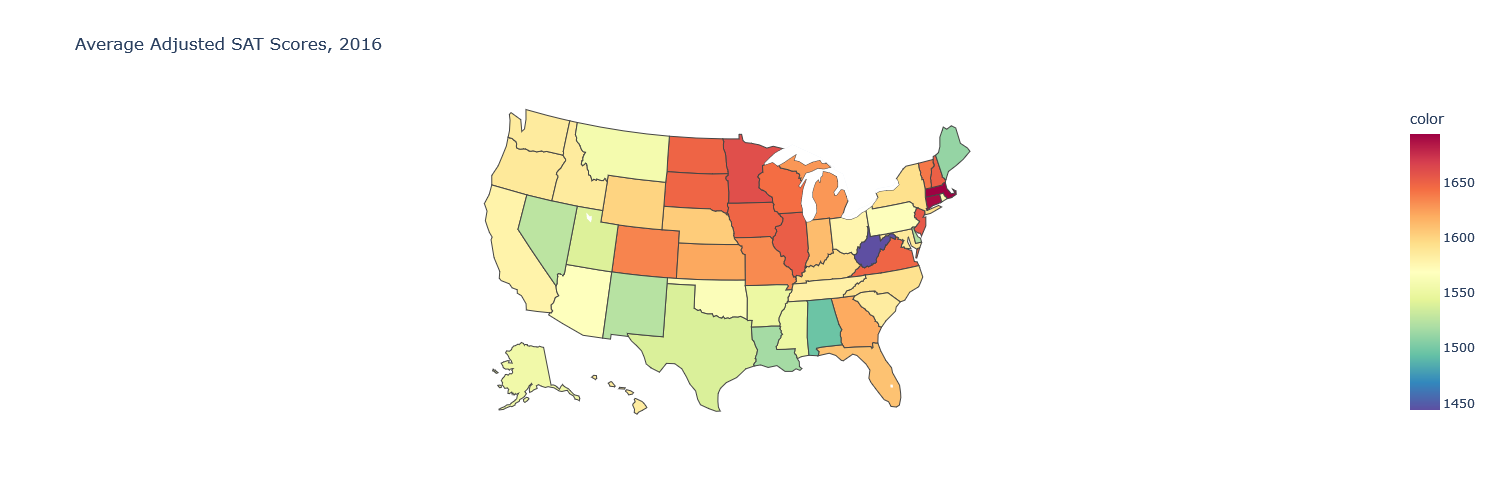

In [434]:
#looking at avg SAT scores by state on a heat map

sat_data['Code'] = sat_data["State"].map(code)
sat_fig = px.choropleth(sat_data,
                    locations='Code',
                    color= sat_data['Average SAT Score Adjusted'].astype(float),

                    color_continuous_scale='spectral_r',
                    hover_name='State',
                    locationmode='USA-states',
                    title="Average Adjusted SAT Scores, 2016",
                    scope='usa',
                    width=700,
                    height=500,
                   )

sat_fig


In [366]:
#load in ACT data
act_data = pd.read_csv(
    Path("../uncc_project1/other_datasets/ACT_scores.csv"))
act_data.head()

,Rank,State,Average ACT Score Adjusted,Raw Average ACT Score,Participation Rate
0,1,Minnesota,23.04,22.9,76%
1,2,Connecticut,22.93,24.2,29%
2,3,Massachusetts,22.72,24.3,23%
3,4,New Hampshire,22.63,24.2,20%
4,5,Ohio,22.47,22.0,72%


In [437]:
#sorts ACT data alphabetically by state
act_abc = act_data.sort_values('State')
act_abc.head()

,Rank,State,Average ACT Score Adjusted,Raw Average ACT Score,Participation Rate
35,36,Alabama,21.01,20.6,80%
44,45,Alaska,20.63,21.0,37%
47,49,Arizona,20.12,19.7,55%
28,29,Arkansas,21.21,20.4,93%
25,26,California,21.41,22.3,29%


In [436]:
#sorts SAT data alphabetically by state
sat_abc = sat_data.sort_values('State')
sat_abc.head()

,Rankfor SAT,State,Average SAT Score Adjusted,Average New SAT Score Adjusted,Raw Average SAT Score,Participation Rate,Code
48,50,Alabama,1496,998,1617,7.00%,AL
38,39,Alaska,1555,1037,1485,54.00%,AK
33,34,Arizona,1568,1045,1547,36.00%,AZ
40,41,Arkansas,1551,1034,1698,4.00%,AR
31,32,California,1579,1053,1504,60.00%,CA


In [368]:
#checks data types of act data
act_abc.dtypes

In [438]:
#converts number to floats
#removes percent signs and drops a duplicate row
#extra row may not show earlier in code. 
#mostly a safeguard because jupyter notebook was being weird earlier
act_abc['Rank']=act_abc['Rank'].astype(float)
act_abc.loc[:,"Participation Rate"] = act_abc.loc[:,"Participation Rate"].str.replace("%", "")
act_abc['ACT Participation Rate']=act_abc['Participation Rate']
act_abc=act_abc.drop(['Participation Rate'],axis=1)
act_abc.head()

,Rank,State,Average ACT Score Adjusted,Raw Average ACT Score,ACT Participation Rate
35,36.0,Alabama,21.01,20.6,80
44,45.0,Alaska,20.63,21.0,37
47,49.0,Arizona,20.12,19.7,55
28,29.0,Arkansas,21.21,20.4,93
25,26.0,California,21.41,22.3,29


In [369]:
#repeats the above process of converting numbers to floats
#dropping percent signs
#dropping duplicate row
sat_abc['Rankfor SAT']=sat_abc['Rankfor SAT'].astype(float)
sat_abc.loc[:,"Participation Rate"] = sat_abc.loc[:,"Participation Rate"].str.replace("%", "")
sat_abc['SAT Participation Rate']=sat_abc['Participation Rate']
sat_abc=sat_abc.drop(['Participation Rate'],axis=1)

In [370]:
#merges alphabetical SAT and ACT dataframes
sat_act= pd.merge(
    sat_abc,
    act_abc,
    how="inner",
    on='State',
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)
sat_act.head()

,Rankfor SAT,State,Average SAT Score Adjusted,Average New SAT Score Adjusted,Raw Average SAT Score,Code,SAT Participation Rate,Rank,Average ACT Score Adjusted,Raw Average ACT Score,ACT Participation Rate
0,50.0,Alabama,1496,998,1617,AL,7.00,36.0,21.01,20.6,80
1,39.0,Alaska,1555,1037,1485,AK,54.00,45.0,20.63,21.0,37
2,34.0,Arizona,1568,1045,1547,AZ,36.00,49.0,20.12,19.7,55
3,41.0,Arkansas,1551,1034,1698,AR,4.00,29.0,21.21,20.4,93
4,32.0,California,1579,1053,1504,CA,60.00,26.0,21.41,22.3,29


In [440]:
#adds in the "spending per pupil" column
#and converts the participation rate numbers (percentages) to float types
#also converts the avg adjusted scores to floats
sat_act['Spending per pupil']=full_df['Spending per pupil']
sat_act['SAT Participation Rate']=sat_act['SAT Participation Rate'].astype(float)
sat_act['ACT Participation Rate']=sat_act['ACT Participation Rate'].astype(float)
sat_act['Average SAT Score Adjusted']=sat_act['Average SAT Score Adjusted'].astype(float)
sat_act['Average ACT Score Adjusted']=sat_act['Average ACT Score Adjusted'].astype(float)
sat_act.dtypes

Rankfor SAT                       float64
State                              object
Average SAT Score Adjusted        float64
Average New SAT Score Adjusted      int64
Raw Average SAT Score               int64
Code                               object
SAT Participation Rate            float64
Rank                              float64
Average ACT Score Adjusted        float64
Raw Average ACT Score             float64
ACT Participation Rate            float64
Spending per pupil                  int64
Spending per pupil in hundreds    float64
dtype: object

In [372]:
#scatter plot looking at Participation rates by state
#when taking the SAT/ACT
#ultimately not used because which test is taken is heavily dependent on where students live
#and what colleges they apply to
#
participation_scatter = sat_act.hvplot.scatter(
    x="Spending per pupil",
    y=['SAT Participation Rate', 'ACT Participation Rate'],
    height=500,
    width=700,
    ylim=[0,110],
    ylabel= 'Participation Rate Percentage',
    xlabel='Spending per Student',
    hover_data={'State'},
    hover_cols="State",
    title="Ranking of NAEP Scores vs Spending per Student")
participation_scatter

:NdOverlay   [Variable]
   :Scatter   [Spending per pupil]   (value,State)

In [373]:
#loads in crime statistics data
#on whole community, not just students
crime_data = pd.read_csv(
    Path("../uncc_project1/other_datasets/crime_data.csv"))
crime_data.head()

,State,Population,Violent crime,Violent crime per 100k,Murder and \nnonnegligent \nmanslaughter,Murder and non-negligent manslaughter per 100k,Rape (revised definition),Rape (rd) per 100k,Rape legacy definition,Rape legacy definition per 100k,...,Aggravated Assault,Aggravated Assault per 100k,Property Crime,Property Crime per 100k,Burglary,Burglary per 100k,Larceny-theft,Larceny-theft per 100k,Motor vehicle theft,Motor vehicle theft per 100k
0,Alabama,4863300.0,25886.0,532.3,407.0,8.4,1916.0,39.4,1385.0,28.5,...,18877.0,388.2,143362.0,2947.8,34065.0,700.5,97574.0,2006.3,11723.0,241.1
1,Alaska,741894.0,5966.0,804.2,52.0,7.0,1053.0,141.9,757.0,102.0,...,4011.0,540.6,24876.0,3353.0,4053.0,546.3,17766.0,2394.7,3057.0,412.1
2,Arizona,6931071.0,32583.0,470.1,380.0,5.5,3290.0,47.5,2452.0,35.4,...,21858.0,315.4,206432.0,2978.4,37736.0,544.4,150275.0,2168.1,18421.0,265.8
3,Arkansas,2988248.0,16461.0,550.9,216.0,7.2,2143.0,71.7,1545.0,51.7,...,11982.0,401.0,97673.0,3268.6,23771.0,795.5,66747.0,2233.6,7155.0,239.4
4,California,39250017.0,174796.0,445.3,1930.0,4.9,13702.0,34.9,10149.0,25.9,...,104375.0,265.9,1002070.0,2553.0,188304.0,479.8,637010.0,1623.0,176756.0,450.3


In [374]:
#adds spending per pupil and rank columns 
crime_data['Spending per pupil']=full_df['Spending per pupil']
crime_data['Rank']=full_df['Rank']
crime_data.head()

,State,Population,Violent crime,Violent crime per 100k,Murder and \nnonnegligent \nmanslaughter,Murder and non-negligent manslaughter per 100k,Rape (revised definition),Rape (rd) per 100k,Rape legacy definition,Rape legacy definition per 100k,...,Property Crime,Property Crime per 100k,Burglary,Burglary per 100k,Larceny-theft,Larceny-theft per 100k,Motor vehicle theft,Motor vehicle theft per 100k,Spending per pupil,Rank
0,Alabama,4863300.0,25886.0,532.3,407.0,8.4,1916.0,39.4,1385.0,28.5,...,143362.0,2947.8,34065.0,700.5,97574.0,2006.3,11723.0,241.1,9636.0,45.0
1,Alaska,741894.0,5966.0,804.2,52.0,7.0,1053.0,141.9,757.0,102.0,...,24876.0,3353.0,4053.0,546.3,17766.0,2394.7,3057.0,412.1,16576.0,49.0
2,Arizona,6931071.0,32583.0,470.1,380.0,5.5,3290.0,47.5,2452.0,35.4,...,206432.0,2978.4,37736.0,544.4,150275.0,2168.1,18421.0,265.8,8882.0,47.0
3,Arkansas,2988248.0,16461.0,550.9,216.0,7.2,2143.0,71.7,1545.0,51.7,...,97673.0,3268.6,23771.0,795.5,66747.0,2233.6,7155.0,239.4,9976.0,38.0
4,California,39250017.0,174796.0,445.3,1930.0,4.9,13702.0,34.9,10149.0,25.9,...,1002070.0,2553.0,188304.0,479.8,637010.0,1623.0,176756.0,450.3,11588.0,40.0


In [375]:
#creates scatter plot for violent crime
violent_crime_100k= crime_data.hvplot.scatter(
    x="Spending per pupil",
    y='Violent crime per 100k',
    height=500,
    width=700,
    ylabel= 'Violent Crime per 100k People',
    xlabel='Spending per Student',
    hover_data={'State'},
    hover_cols="State",
    title="Violent Crime vs Spending per Student")
violent_crime_100k
    

:Scatter   [Spending per pupil]   (Violent crime per 100k,State)

In [408]:
#violent crime spending correlation
#drops outlier
vc100k_corr = crime_data["Spending per pupil"].drop([1]).astype(float).corr(crime_data["Violent crime per 100k"].drop([1]).astype(float), method='pearson') 
vc100k_corr

-0.3382491947063336

In [377]:
#creates scatter plot for property crime
property_crime_100k= crime_data.hvplot.scatter(
    x="Spending per pupil",
    y='Property Crime per 100k',
    height=500,
    width=700,
    ylabel= 'Property Crime per 100k People',
    xlabel='Spending per Student',
    hover_data={'State'},
    hover_cols="State",
    title="Property Crime vs Spending per Student")
property_crime_100k

:Scatter   [Spending per pupil]   (Property Crime per 100k,State)

In [378]:
#property crime v spending correlation
pc100k_corr = crime_data["Spending per pupil"].astype(float).corr(crime_data["Property Crime per 100k"].astype(float), method='pearson') 
pc100k_corr

-0.4921070172142063

In [379]:
#same as above 
gta_100k= crime_data.hvplot.scatter(
    x="Spending per pupil",
    y='Motor vehicle theft per 100k',
    height=500,
    width=700,
    ylabel= 'Motor vehicle theft per 100k',
    xlabel='Spending per Student',
    hover_data={'State'},
    hover_cols="State",
    title="Motor vehicle Theft vs Spending per Student")
gta_100k

:Scatter   [Spending per pupil]   (Motor vehicle theft per 100k,State)

In [380]:
#same as above
gta100k_corr = crime_data["Spending per pupil"].astype(float).corr(crime_data["Motor vehicle theft per 100k"].astype(float), method='pearson') 
gta100k_corr

-0.344217782856014

In [381]:
#same as above
murder_100k= crime_data.hvplot.scatter(
    x="Spending per pupil",
    y='Murder and non-negligent manslaughter per 100k',
    height=500,
    width=700,
    ylabel= 'Murder and non-negligent manslaughter per 100k',
    xlabel='Spending per Student',
    hover_data={'State'},
    hover_cols="State",
    title="Murder and Non-Negligent vs Spending per Student")
murder_100k

:Scatter   [Spending per pupil]   (Murder and non-negligent manslaughter per 100k,State)

In [409]:
#same as above
#drops outlier
murder100k_corr = crime_data["Spending per pupil"].drop([17]).astype(float).corr(crime_data["Murder and non-negligent manslaughter per 100k"].drop([17]).astype(float), method='pearson') 
murder100k_corr

-0.3149547956388011

In [383]:
#same as above
theft_100k= crime_data.hvplot.scatter(
    x="Spending per pupil",
    y='Larceny-theft per 100k',
    height=500,
    width=700,
    ylabel= 'Larceny-Theft per 100k',
    xlabel='Spending per Student',
    hover_data={'State'},
    hover_cols="State",
    title="Larceny-Theft per 100k vs Spending per Student")
theft_100k


:Scatter   [Spending per pupil]   (Larceny-theft per 100k,State)

In [384]:
#same as above
theft100k_corr = crime_data["Spending per pupil"].astype(float).corr(crime_data["Larceny-theft per 100k"].astype(float), method='pearson') 
theft100k_corr

-0.42532787859158466

In [385]:
#same as above
rape_100k= crime_data.hvplot.scatter(
    x="Spending per pupil",
    y='Rape (rd) per 100k',
    height=500,
    width=700,
    ylabel= 'Rape per 100k',
    xlabel='Spending per Student',
    hover_data={'State'},
    hover_cols="State",
    title="Rape per 100k vs Spending per Student")
rape_100k

:Scatter   [Spending per pupil]   (Rape (rd) per 100k,State)

In [386]:
#drops outlier
crime_data2=crime_data.drop([1])

In [387]:
#calculates correlation
rape100k_corr = crime_data2["Spending per pupil"].astype(float).corr(crime_data2["Rape (rd) per 100k"].astype(float), method='pearson') 
rape100k_corr

-0.519077075844965

In [388]:
# ALL OF THE FOLLOWING: 
#School Rank compared to crime rather than spending per pupil 
#using scatter plots and correlation
#as above
#outliers are dropped when necessary

In [389]:
violent_crime_100k= crime_data.hvplot.scatter(
    x="Rank",
    y='Violent crime per 100k',
    height=500,
    width=500,

    ylabel= 'Violent Crime per 100k People',
    xlabel='Rank',
    hover_data={'State'},
    hover_cols="State",
    title="Violent Crime vs Rank")
violent_crime_100k
    

:Scatter   [Rank]   (Violent crime per 100k,State)

In [390]:
vc100k_corr = crime_data["Rank"].astype(float).corr(crime_data["Violent crime per 100k"].astype(float), method='pearson') 
vc100k_corr

0.5765479634936878

In [391]:
property_crime_100k= crime_data.hvplot.scatter(
    x="Rank",
    y='Property Crime per 100k',
    height=500,
    width=500,

    ylabel= 'Property Crime per 100k People',
    xlabel='Rank',
    hover_data={'State'},
    hover_cols="State",
    title="Property Crime vs Rank")
property_crime_100k

:Scatter   [Rank]   (Property Crime per 100k,State)

In [392]:
crime_data5=crime_data.drop([30,46])
pc100k_corr = crime_data5["Rank"].astype(float).corr(crime_data5["Property Crime per 100k"].astype(float), method='pearson') 
pc100k_corr

0.6368521212960802

In [393]:
gta_100k= crime_data.hvplot.scatter(
    x="Rank",
    y='Motor vehicle theft per 100k',
    height=500,
    width=500,

    ylabel= 'Motor vehicle theft per 100k',
    xlabel='Rank',
    hover_data={'State'},
    hover_cols="State",
    title="Motor vehicle Theft vs Rank")
gta_100k

:Scatter   [Rank]   (Motor vehicle theft per 100k,State)

In [394]:
gta100k_corr = crime_data["Rank"].astype(float).corr(crime_data["Motor vehicle theft per 100k"].astype(float), method='pearson') 
gta100k_corr

0.5078653176881202

In [395]:
murder_100k= crime_data.hvplot.scatter(
    x="Rank",
    y='Murder and non-negligent manslaughter per 100k',
    height=500,
    width=500,
 
    ylabel= 'Murder and non-negligent manslaughter per 100k',
    xlabel='Rank',
    hover_data={'State'},
    hover_cols="State",
    title="Murder and Non-Negligent vs Rank")
murder_100k

:Scatter   [Rank]   (Murder and non-negligent manslaughter per 100k,State)

In [396]:
crime_data4=crime_data.drop([17])
murder100k_corr = crime_data4["Rank"].astype(float).corr(crime_data4["Murder and non-negligent manslaughter per 100k"].astype(float), method='pearson') 
murder100k_corr

0.41163379576173126

In [397]:
theft_100k= crime_data.hvplot.scatter(
    x="Rank",
    y='Larceny-theft per 100k',
    height=500,
    width=500,

    ylabel= 'Larceny-Theft per 100k',
    xlabel='Rank',
    hover_data={'State'},
    hover_cols="State",
    title="Larceny-Theft per 100k vs Rank")
theft_100k


:Scatter   [Rank]   (Larceny-theft per 100k,State)

In [398]:
theft100k_corr = crime_data["Rank"].astype(float).corr(crime_data["Larceny-theft per 100k"].astype(float), method='pearson') 
theft100k_corr

0.5137042549527701

In [399]:
rape_100k= crime_data.hvplot.scatter(
    x="Rank",
    y='Rape (rd) per 100k',
    height=500,
    width=500,
  
    ylabel= 'Rape per 100k',
    xlabel='Rank',
    hover_data={'State'},
    hover_cols="State",
    title="Rape per 100k vs Rank")
rape_100k

:Scatter   [Rank]   (Rape (rd) per 100k,State)

In [400]:
crime_data2=crime_data.drop([1])

In [401]:
rape100k_corr = crime_data2["Rank"].astype(float).corr(crime_data2["Rape (rd) per 100k"].astype(float), method='pearson') 
rape100k_corr

0.4820155214502388